### 데이터 특성에 맞는 차트 선택 방법

* 기본 차트: 선, 막대, 산점도, 히스토그램, 파이
* 차트 스타일링: 색상, 선, 마커
* 차트 제목, 축, 레이블, 범례, 격자

### 용도에 따른 그래프 종류

* 시간에 따른 변화 -> 선 그래프
* 항목 간에 비교하고 싶을 때 -> 막대 그래프
* 두 변수의 관계 -> 산점도
* 상관관계 분석 -> 히트맵
* 데이터의 분포를 파악 -> 히스토그램
* 비율 -> 파이 차트

### Matplotlib 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from koreanize_matplotlib import koreanize
koreanize()

In [2]:
production_df = pd.read_csv('./data/05_production.csv', parse_dates=['production_date'])
equipment_df = pd.read_csv('./data/01_equipment.csv')

In [3]:
production_df['불량률'] = (production_df['defect_quantity']/production_df['actual_quantity']*100).round(2)
production_df

,production_id,equipment_id,product_code,production_date,start_time,end_time,target_quantity,actual_quantity,good_quantity,defect_quantity,cycle_time,work_order_no,lot_no,operator_id,shift,created_at,updated_at,불량률
0,1,INJ-001,BUMPER-A,2024-01-01,2024-01-01 08:14:00,2024-01-01 09:53:32,97,81,77,4,73.73,WO202401019935,LOT2024010100101,OP003,DAY,2026-01-30 00:42:48,2026-01-30 00:42:48,4.94
1,2,INJ-001,BUMPER-A,2024-01-01,2024-01-01 21:02:00,2024-01-01 22:33:43,83,78,72,6,70.56,WO202401012535,LOT2024010100110,OP006,NIGHT,2026-01-30 00:42:48,2026-01-30 00:42:48,7.69
2,3,INJ-002,BUMPER-A,2024-01-01,2024-01-01 10:12:00,2024-01-01 13:16:28,149,135,132,3,81.99,WO202401018359,LOT2024010100201,OP001,DAY,2026-01-30 00:42:48,2026-01-30 00:42:48,2.22
3,4,INJ-002,DASH-C,2024-01-01,2024-01-01 12:48:00,2024-01-01 15:16:31,100,92,90,2,96.87,WO202401016574,LOT2024010100202,OP003,DAY,2026-01-30 00:42:48,2026-01-30 00:42:48,2.17
4,5,INJ-002,DOOR-B,2024-01-01,2024-01-01 20:48:00,2024-01-01 23:12:13,123,129,122,7,67.08,WO202401012674,LOT2024010100210,OP004,NIGHT,2026-01-30 00:42:48,2026-01-30 00:42:48,5.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,1868,PRESS-002,BUMPER-A,2024-03-31,2024-03-31 20:19:00,2024-03-31 23:25:19,150,144,119,25,77.63,WO202403317101,LOT2024033100210,OP006,NIGHT,2026-01-30 00:42:48,2026-01-30 00:42:48,17.36
1868,1869,PRESS-002,DASH-C,2024-03-31,2024-04-01 00:15:00,2024-04-01 02:59:58,136,130,109,21,76.15,WO202403318434,LOT2024033100211,OP004,NIGHT,2026-01-30 00:42:48,2026-01-30 00:42:48,16.15
1869,1870,PRESS-002,BUMPER-A,2024-03-31,2024-04-01 05:53:00,2024-04-01 07:26:15,84,80,66,14,69.95,WO202403317294,LOT2024033100212,OP004,NIGHT,2026-01-30 00:42:48,2026-01-30 00:42:48,17.50
1870,1871,ASM-001,BUMPER-A,2024-03-31,2024-03-31 10:24:00,2024-03-31 13:25:41,143,121,101,20,90.10,WO202403317268,LOT2024033100101,OP003,DAY,2026-01-30 00:42:48,2026-01-30 00:42:48,16.53


In [4]:
daily_production = production_df.groupby('production_date')['actual_quantity'].sum()

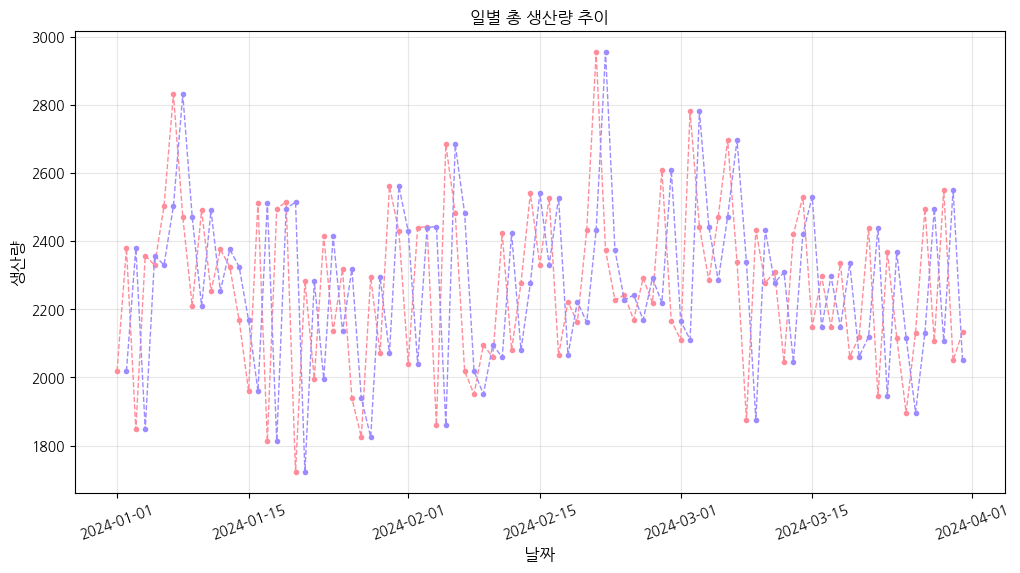

In [5]:
# plot: 선 그래프(시계열 데이터)
plt.figure(figsize=(12, 6))
plt.plot(daily_production.index, daily_production.values,
         color='#FF8C9B', linewidth=1, marker='o', markersize=3, linestyle='--')
plt.plot(daily_production.shift().index, daily_production.shift().values,
         color="#9D8CFF", linewidth=1, marker='o', markersize=3, linestyle='--')

plt.grid(True, alpha=0.3)
# plt.tight_layout() # 레이아웃 자동 조절

plt.title('일별 총 생산량 추이')
plt.xlabel('날짜', fontsize=12)
plt.ylabel('생산량', fontsize=12)
plt.xticks(rotation=20)

plt.savefig('chart01.jpg')

plt.show()

In [6]:
equip_df = production_df.groupby('equipment_id')['actual_quantity'].sum().sort_values(ascending=False)

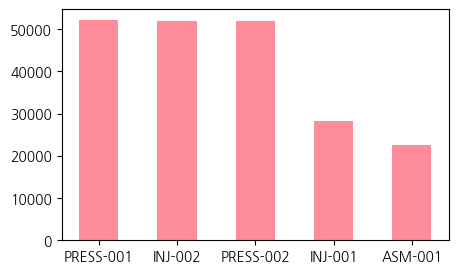

In [7]:
# bar: 막대 그래프 - 수직(카테고리 데이터)
plt.figure(figsize=(5, 3))
plt.bar(equip_df.index, equip_df.values, color='#FF8C9B', width=0.5)
plt.show()

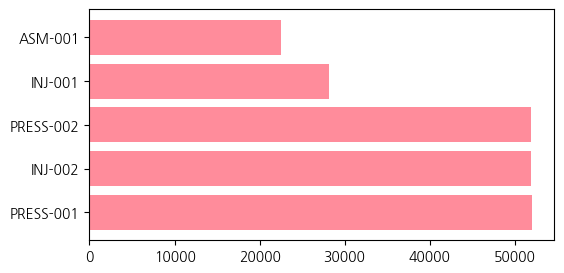

In [8]:
# bar: 막대 그래프 - 수평(카테고리 데이터)
plt.figure(figsize=(6, 3))
plt.barh(equip_df.index, equip_df.values, color='#FF8C9B')
plt.show()

In [9]:
# 상관계수
production_df[['actual_quantity', 'defect_quantity']].corr()

,actual_quantity,defect_quantity
actual_quantity,1.000000,0.259056
defect_quantity,0.259056,1.000000


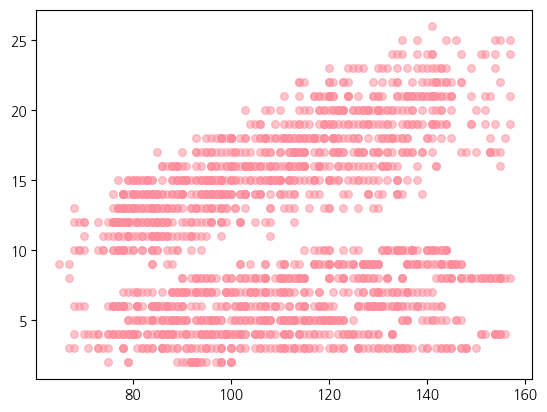

In [10]:
# scatter: 산점도 그래프(두 변수의 상관 관계 분석, outlier 파악, 패턴, 군집(clustering))
# 생산량 vs 불량 개수
plt.scatter(production_df['actual_quantity'], production_df['defect_quantity'],
            s=30, alpha=0.5, color='#FF8C9B')
plt.show()

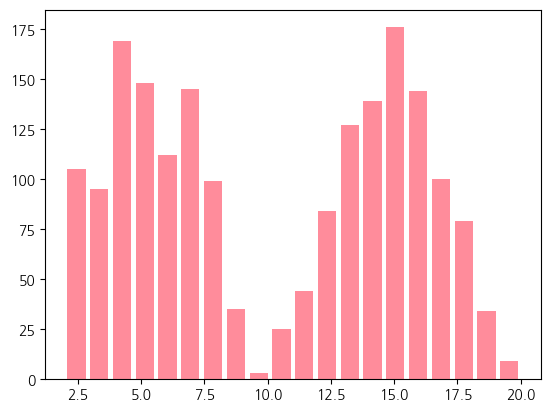

In [11]:
# hist: 히스토그램(구간별 분포 파악, 편향)
# 불량률 분포
plt.hist(production_df['불량률'], rwidth=0.8, bins=20, color='#FF8C9B') # default bins(막대 개수): 10개
plt.show()

In [12]:
production_df['불량률'].describe()

count    1872.000000
mean       10.222692
std         5.141065
min         2.000000
25%         5.300000
50%        11.000000
75%        15.000000
max        20.000000
Name: 불량률, dtype: float64

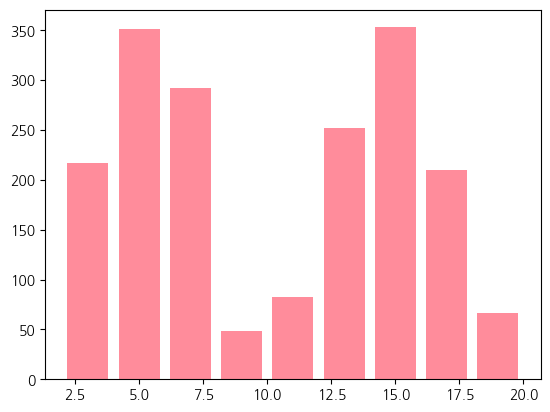

In [13]:
my_bins = np.arange(2.0, 20.0 + 2, 2.0)
plt.hist(production_df['불량률'], rwidth=0.8, bins=my_bins, color='#FF8C9B') # default bins(막대 개수): 10개
plt.show()

In [14]:
# pie: 파이 차트(카테고리별 비율)
# 교대조별 생산 건수
shift_df = production_df.groupby('shift')['actual_quantity'].sum()
shift_df

shift
DAY      102690
NIGHT    103914
Name: actual_quantity, dtype: int64

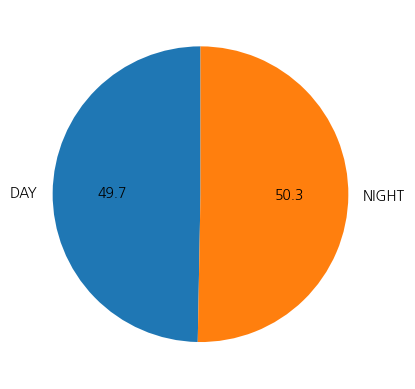

In [15]:
plt.pie(shift_df, labels=shift_df.index, startangle=90, autopct='%.1f')
plt.show()